# Project: Movie Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis we will take a closer look at the TMDb movie data set. We will see which genres are produced mostly and which directors you should get in touch with if you plan to produce a rewarding movie.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties
> First we check out the dataset. What information is inside, what does the information look like, what information can be dropped.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> No we have to see if data is missing and what kind of data we have for each column.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> We can drop the following columns as they are not needed for our investigation:

> ID, IMDB, Homepage, Tagline, keywords, Overview, release date are very specific information
>Popularity is not needed, since we are going to concentrate on other indicators

> Budget and Revenue are already adjusted in the dataset. The original values are not from interest anymore, since we consider it right to balance the inflation over the time.

In [5]:
df.drop(['id','imdb_id','popularity','budget','revenue', 'homepage', 'tagline','release_date', 'keywords','overview'], axis=1, inplace=True)

>Now we take a look at the histograms to understand more about the distribution. We realize that most of the data is reasonable. 

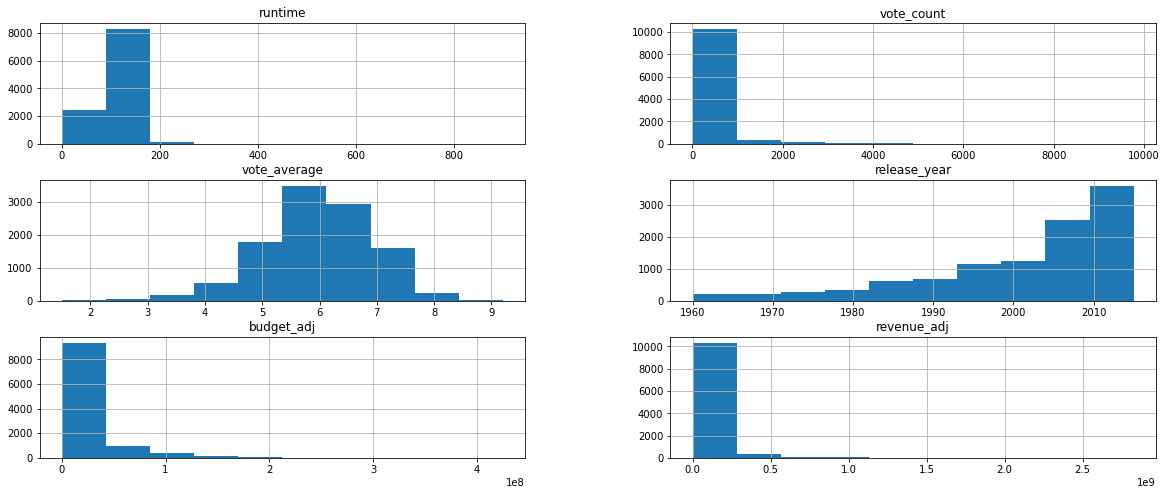

In [6]:
df.hist(figsize=(20,8));

> The runtime distribution looks reasonable. Although there are some upward outliers, these are not typical movies. We'll leave this in for now. But you could also filter for films with a running time of less than 300 minutes in order to concentrate on typical cinema films.

>Vote Count: This is not from interest now, but we leave it as it is. Maybe we need this data later.

>Vote Average: Looks normally distributed and reasonable.

>Release Year: This is already very interesting. It looks like an exponential growth and increases steaditly over the years.

> Budget adj and Renevue adj: This is not nicely readable. I would make sense to convert the numbers into Millions. 

### Data Cleaning

In [7]:
df1 = df[df.isna().any(axis=1)]
df1

,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,36,7.8,2015,0.0,0.0
259,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,10,7.6,2015,0.0,0.0
295,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,12,6.3,2015,0.0,0.0
298,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,10,4.7,2015,0.0,0.0
328,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10804,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,35,6.3,1978,0.0,0.0
10806,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,12,5.9,1978,0.0,0.0
10816,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,14,6.0,1978,0.0,0.0
10842,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,12,7.9,1966,0.0,0.0


>Here we can see that there is information missing for production companies. I assume that most of these Productions were created by small or "No-Name" Companies. Let's replace them with a generic "No-Name" Company name.

In [8]:
df['production_companies'] = df['production_companies'].fillna('NoName Company')
df1 = df[df.isna().any(axis=1)]

In [9]:
df.isnull().sum()

original_title           0
cast                    76
director                44
runtime                  0
genres                  23
production_companies     0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

>The remaining missing values are negligible in regards to the size of the dataset so that we can drop these lines.

In [10]:
df.dropna(subset=['cast', 'director','genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10732 non-null  object 
 1   cast                  10732 non-null  object 
 2   director              10732 non-null  object 
 3   runtime               10732 non-null  int64  
 4   genres                10732 non-null  object 
 5   production_companies  10732 non-null  object 
 6   vote_count            10732 non-null  int64  
 7   vote_average          10732 non-null  float64
 8   release_year          10732 non-null  int64  
 9   budget_adj            10732 non-null  float64
 10  revenue_adj           10732 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1006.1+ KB


> Now our dataset looks much better. There are no values missing anymore. We still have some zeros within the Budget and Revenue column. We are going to clean up those rows now and we are going to convert the remaining ones to millions. 

In [11]:
limit=df
df = df.loc[df['budget_adj'] * df['revenue_adj'] != 0]
limit2=df
df['budget_adj'] = df['budget_adj'].divide(1000000);
df['revenue_adj'] = df['revenue_adj'].divide(1000000);
df=df.round(3)
df.rename(columns={"runtime": "runtime (min)","budget_adj": "Budget (Mil.)", "revenue_adj": "Revenue (Mil.)"}, inplace=True)
df.describe()

C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,runtime (min),vote_count,vote_average,release_year,Budget (Mil.),Revenue (Mil.)
count,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000
mean,109.212987,528.278442,6.168390,2001.260519,44.289881,137.195923
std,19.913488,880.245090,0.794817,11.285056,44.808378,216.184832
min,15.000000,10.000000,2.200000,1960.000000,0.000000,0.000000
25%,95.000000,71.000000,5.700000,1995.000000,13.172000,18.415000
50%,106.000000,204.500000,6.200000,2004.000000,30.045000,61.791000
75%,119.000000,580.750000,6.700000,2010.000000,60.728500,163.377750
max,338.000000,9767.000000,8.400000,2015.000000,425.000000,2827.124000


<a id='eda'></a>
## Exploratory Data Analysis
> In this chapter we will try to find answer to the following questions:
- Which type of movies are mainly produced?
- Which Production Companies have released most of the movies?
- Which Production where the best and the worst?
- Which director should you book to get the best reward for your investment?


### Research Question 1: Which type of movies are mainly produced ?

In [12]:
genres= df['genres'].str.split('|', expand=True)

In [13]:
genres[2].append(genres[3],[4],[5]).reset_index(drop=True)
genres_list = genres[0].append(genres[1],[2]).reset_index(drop=True)

Text(0.5, 1.0, 'Histogram of Genres')

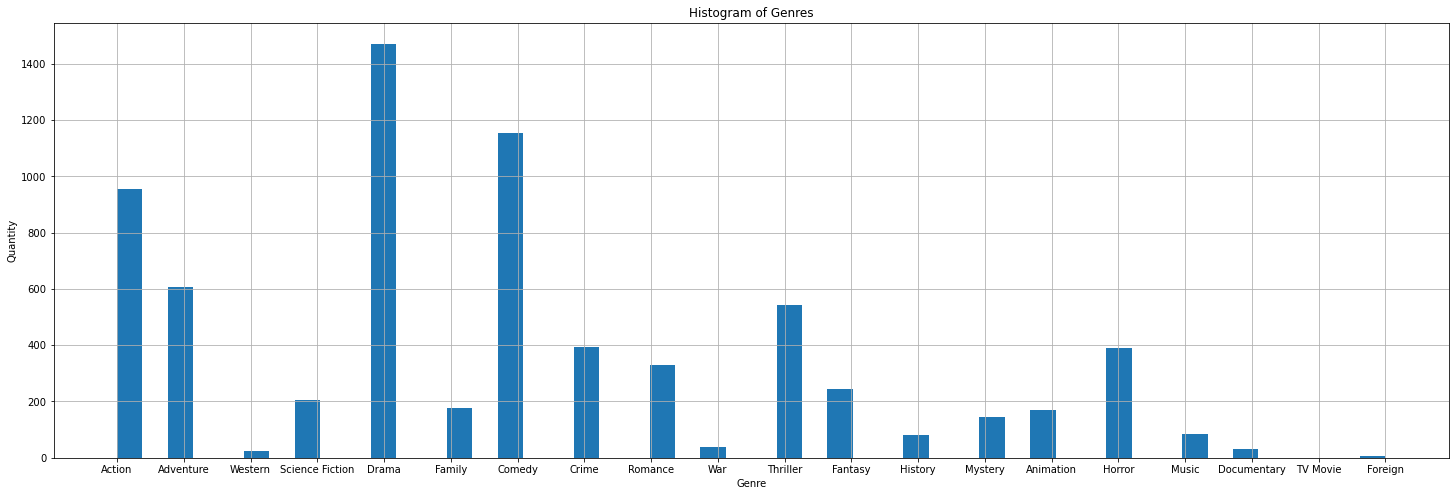

In [14]:
genres_list.hist(figsize=(25,8), bins=50);
plt.xlabel('Genre')
plt.ylabel('Quantity')
plt.title('Histogram of Genres')

In this plot we can see that most of the movies released are of the genres Drama, Comedy, Action and Thriller.

<a id='eda'></a>
### Research Question 2: Which production companies have released most of the movies ?

In [15]:
companies= df['production_companies'].str.split('|', expand=True)
companies[2].append(companies[3],[4],[5]).reset_index()
companies_list = companies[2].append(companies[0],[1]).reset_index()
companies_list.columns = ['Index','Company'] 
companies_list

,Index,Company
0,0,Legendary Pictures
1,1,None
2,2,Red Wagon Entertainment
3,3,Bad Robot
4,4,Media Rights Capital
...,...,...
7695,7695,Chenault Productions
7696,7696,Universal Pictures
7697,7697,Paramount Pictures
7698,7698,Twentieth Century Fox Film Corporation


In [16]:
top_companies=companies_list.groupby(by="Company").count().nlargest(15, 'Index')
top_companies

,Index
Company,
Universal Pictures,287
Paramount Pictures,266
Columbia Pictures,177
Twentieth Century Fox Film Corporation,172
Warner Bros.,150
New Line Cinema,144
Walt Disney Pictures,117
Miramax Films,78
Columbia Pictures Corporation,73


In [17]:
companies_list.groupby(by="Company").count().nlargest(500, 'Index').describe()


,Index
count,500.000000
mean,8.826000
std,24.396108
min,2.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,287.000000


>Most of the movies are produced by the well known Production Companies. Furthermore we can see, that 75% of the Top 500 Companies have released less than 6 movies. 

### Research Question 3: Which productions were the best and the worst?

In [18]:
df.head()

,original_title,cast,director,runtime (min),genres,production_companies,vote_count,vote_average,release_year,Budget (Mil.),Revenue (Mil.)
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,138.0,1392.446
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,138.0,348.161
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101.2,271.619
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,184.0,1902.723
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174.8,1385.749


> Let us derive a ROI(return on investment) to analyze whether it was worth making a film. We can also add a column for the producer's mood (reward), wether he/she is in good mood or bad mood after the release of the movie. "Bad" means that the film brought in less than it cost, while "good" means that the film made a profit

In [19]:
df = df.loc[df['Revenue (Mil.)'] * df['Budget (Mil.)'] != 0]
df['ROI'] = df['Revenue (Mil.)'] / df['Budget (Mil.)']


In [20]:
df['reward'] = ['bad' if x<1 else 'okay' if 0.9<=x<1.5 else 'very good' for x in df['ROI']]


Text(0.5, 1.0, 'financial gain or loss with production')

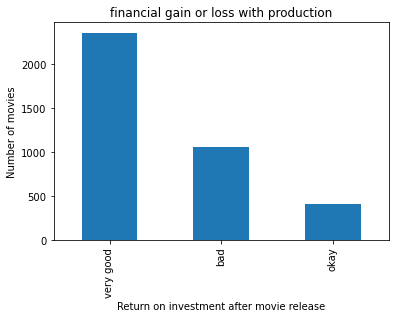

In [21]:
df.reward.value_counts().plot(kind='bar')
plt.xlabel('Return on investment after movie release')
plt.ylabel('Number of movies')
plt.title('financial gain or loss with production')

>Here we can see that most of the productions were very good. At the same time, however, more than a third were bad or just okay.

In [22]:
reward=df[["vote_average","original_title","director", "ROI","Budget (Mil.)","Revenue (Mil.)","reward"]]
reward.sort_values(by=['ROI'],ascending=False)


,vote_average,original_title,director,ROI,Budget (Mil.),Revenue (Mil.),reward
7447,6.1,Paranormal Activity,Oren Peli,12709.125000,0.016,203.346,very good
2449,6.3,The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,9837.727273,0.033,324.645,very good
1354,7.1,Eraserhead,David Lynch,699.555556,0.036,25.184,very good
7277,6.3,Pink Flamingos,John Waters,496.619048,0.063,31.287,very good
7178,6.5,Super Size Me,Morgan Spurlock,439.840000,0.075,32.988,very good
...,...,...,...,...,...,...,...
3752,4.8,The Good Doctor,Lance Daly,0.000860,5.816,0.005,bad
6274,6.3,Chaos,Tony Giglio,0.000821,13.399,0.011,bad
5586,5.2,The Adventurer: The Curse of the Midas Box,Jonathan Newman,0.000256,23.401,0.006,bad
7602,5.4,Death Defying Acts,Gillian Armstrong,0.000190,21.033,0.004,bad


<AxesSubplot:xlabel='original_title'>

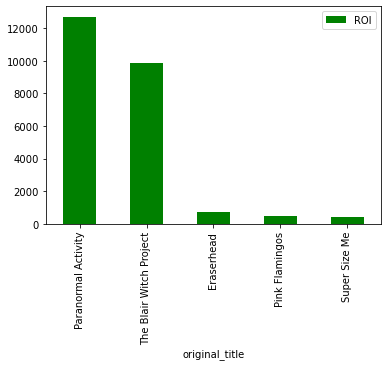

In [23]:
reward.nlargest(5,'ROI').plot(kind='bar',x='original_title',y='ROI',color='green')

> The best movies in terms of Budget and Revenue were "The Blair Witch Project" and "Paranormal Activity". 

<AxesSubplot:xlabel='director'>

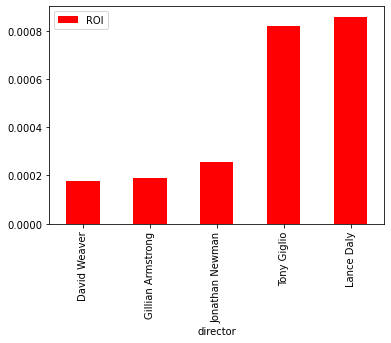

In [24]:
reward.nsmallest(5,'ROI').plot(kind='bar',x='director',y='ROI',color='red')

>The worst movies in terms of budget and revenue were produced by Jonatahn Newman, Tony Giglio, Renny Harlin, Lawrence Kassanoff and Eran Creevy.

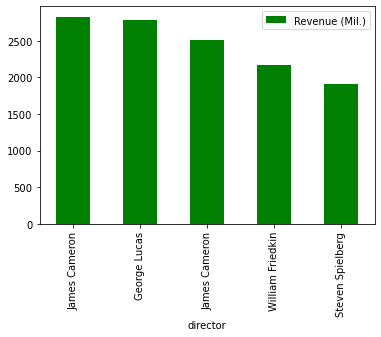

In [25]:

reward.nlargest(5,'Revenue (Mil.)').plot(kind='bar',x='director',y='Revenue (Mil.)',color='green')
plt.show()

> The best movies were produced by James Cameron, George Lucas, William Friedkin and Steven Spielberg.

<a id='conclusions'></a>
## Conclusions

> We have seen which Production Companies have released most of the movies. Also we could find out which genres are mainly produced by those companies.
>Then we took a closer look at the financial indicators and we could determine the best and worst movies in terms of the revenue/Budget ratio. 
>The movie "Paranormal Activity" only cost 16k USD and made a profit tenthousend of times higher. If you want to know how to spend small money for a great movie you should contact the director Oren Peli.


<a id='conclusions'></a>
## Limitations

> For the financial analysis we had to kick out all the entries with Budget or Revenue equal 0 as this did not allow any mathematical division. If we compare the number of entries before and after this cleanup we can see that more than 64 % percent of our data is gone. As a result we have a working dataset for our analysis but also we loose the representative statistic.b

In [37]:
(limit.count() - limit2.count())/limit.count()*100

original_title          64.125978
cast                    64.125978
director                64.125978
runtime                 64.125978
genres                  64.125978
production_companies    64.125978
vote_count              64.125978
vote_average            64.125978
release_year            64.125978
budget_adj              64.125978
revenue_adj             64.125978
dtype: float64

>limit = df before cleanup, limit2 = df after cleanup